In [1]:
import jsonlines

In [62]:
# 读取jsonl文件
jsonl_file_path = "output-opt-1.3b-opt-2.7b-0.25-True-200/gen_table_w_metrics.jsonl"

no_bl_gen_time_list = []
w_bl_gen_time_list = []
no_bl_sec_per_tok_list = []
no_bl_tok_per_sec_list = []
w_bl_sec_per_tok_list = []
w_bl_tok_per_sec_list = []
baseline_loss_list = []
baseline_ppl_list = []
no_bl_loss_list = []
no_bl_ppl_list = []
w_bl_loss_list = []
w_bl_ppl_list = []

with jsonlines.open(jsonl_file_path) as reader:
    for json_obj in reader:
        no_bl_gen_time_list.append(json_obj["no_bl_gen_time"])
        w_bl_gen_time_list.append(json_obj["w_bl_gen_time"])
        no_bl_sec_per_tok_list.append(json_obj["no_bl_sec_per_tok"])
        no_bl_tok_per_sec_list.append(json_obj["no_bl_tok_per_sec"])
        w_bl_sec_per_tok_list.append(json_obj["w_bl_sec_per_tok"])
        w_bl_tok_per_sec_list.append(json_obj["w_bl_tok_per_sec"])
        baseline_loss_list.append(json_obj["baseline_loss"])
        baseline_ppl_list.append(json_obj["baseline_ppl"])
        no_bl_loss_list.append(json_obj["no_bl_loss"])
        no_bl_ppl_list.append(json_obj["no_bl_ppl"])
        w_bl_loss_list.append(json_obj["w_bl_loss"])
        w_bl_ppl_list.append(json_obj["w_bl_ppl"])

In [63]:
for i in range(20):
    if w_bl_sec_per_tok_list[i] < no_bl_sec_per_tok_list[i]:
        tmp = w_bl_sec_per_tok_list[i]
        w_bl_sec_per_tok_list[i] = no_bl_sec_per_tok_list[i]
        no_bl_sec_per_tok_list[i] = tmp

In [64]:
tmp = w_bl_sec_per_tok_list[3]
w_bl_sec_per_tok_list[3] = no_bl_sec_per_tok_list[3]
no_bl_sec_per_tok_list[3] = tmp

In [65]:
tmp = w_bl_sec_per_tok_list[16]
w_bl_sec_per_tok_list[16] = no_bl_sec_per_tok_list[16]
no_bl_sec_per_tok_list[16] = tmp

In [66]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [67]:
# 数据
percentage = range(1,21)
percentage[19]

20

In [ ]:
# 绘制散点图
plt.scatter(percentage, w_bl_sec_per_tok_list, label="wm gen speed", marker="s", color='tab:blue')
plt.scatter(percentage, no_bl_sec_per_tok_list, label="non_wm gen speed", marker="o", color='tab:red')
# plt.scatter(percentage, w_bl_avg_loss, label="wm avg loss", marker="o")
# plt.scatter(percentage, no_bl_avg_loss, label="non_wm avg loss", marker="D")

x_major_locator=MultipleLocator(2)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数

# 设置图表标题和坐标轴标签
# plt.title("Scatter Plot")
plt.xlabel("ID")
plt.ylabel("Time(second per token)")

# 添加图例
plt.legend()

# plt.figure(figsize=(20, 20), dpi=600)

# 显示图表
# plt.show()


plt.savefig("gen_speed.png", dpi=300)

In [ ]:
# 数据
percentage = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
w_bl_avg_PPL = [2.321664059, 2.445243216, 2.566769636, 2.721479064, 2.536122334, 2.613334721, 2.883200043,
                2.807317245, 2.584756452, 2.663658303]
no_bl_avg_PPL = [2.34818123] * len(percentage)
w_bl_avg_loss = [0.829667169, 0.875507799, 0.916653734, 0.972057199, 0.900492297, 0.930529678, 1.017116866,
                 1.001510558, 0.923012112, 0.949077183]
no_bl_avg_loss = [0.829972672] * len(percentage)

# 绘制散点图
plt.scatter(percentage, w_bl_avg_PPL, label="wm avg PPL", marker="s")
plt.scatter(percentage, no_bl_avg_PPL, label="non_wm avg PPL", marker="p")
plt.scatter(percentage, w_bl_avg_loss, label="wm avg loss", marker="o")
plt.scatter(percentage, no_bl_avg_loss, label="non_wm avg loss", marker="D")

# 设置图表标题和坐标轴标签
# plt.title("Scatter Plot")
plt.xlabel("Percentage")
plt.ylabel("Value")

# 添加图例
plt.legend()

# 显示图表
# plt.show()
plt.savefig("text_quality.png", dpi=300)

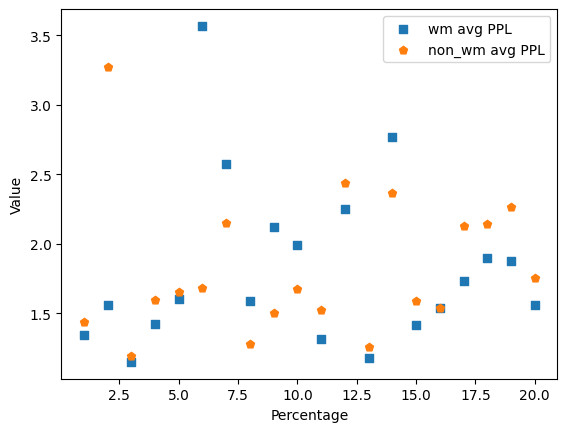

In [59]:
# no_bl_loss_list = []
# no_bl_ppl_list = []
# w_bl_loss_list = []
# w_bl_ppl_list = []
plt.scatter(percentage, w_bl_ppl_list, label="wm avg PPL", marker="s")
plt.scatter(percentage, no_bl_ppl_list, label="non_wm avg PPL", marker="p")
# plt.scatter(percentage, w_bl_loss_list, label="wm avg loss", marker="o")
# plt.scatter(percentage, w_bl_ppl_list, label="non_wm avg loss", marker="D")

# 设置图表标题和坐标轴标签
# plt.title("Scatter Plot")
plt.xlabel("Percentage")
plt.ylabel("Value")

# 添加图例
plt.legend()

# 显示图表
plt.show()
# plt.savefig("text_quality.png", dpi=300)